# Ford GoBikes Analysis
## by (Ahmed Elgahama)

## Preliminary Wrangling

> this dataset is for Ford Rented Bikes for the year 2019.



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Data Gathering

- this data is from https://www.lyft.com/bikes/bay-wheels/system-data

In [2]:
# loading data from multiple files and combining them into one file 
# this cell will be run for the first time only

#files=["../../data/201901-fordgobike-tripdata.csv",
#     "../../data/201902-fordgobike-tripdata.csv",
#     "../../data/201903-fordgobike-tripdata.csv",
#     "../../data/201904-fordgobike-tripdata.csv",
#     "../../data/201905-baywheels-tripdata.csv",
#     "../../data/201906-baywheels-tripdata.csv",
#     "../../data/201907-baywheels-tripdata.csv",
#     "../../data/201908-baywheels-tripdata.csv",
#     "../../data/201909-baywheels-tripdata.csv",
#     "../../data/201910-baywheels-tripdata.csv",
#     "../../data/201911-baywheels-tripdata.csv",
#     "../../data/201912-baywheels-tripdata.csv",
#      ]

#frames = [pd.read_csv(datafile) for datafile in files]
#df = pd.concat(frames)
#df.to_csv('../../data/data.csv', index=False) 



In [3]:
df = pd.read_csv("../data/data.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [4]:
# make sure that index is unique for every record

df.reset_index(drop=True,inplace=True)

# Data Assessing
- Start checking the Data

In [5]:
# print columns information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [6]:
# Getting the shape of the data 

print("the shape of the data is :",df.shape[0],"rows and ",df.shape[1],"columns.")

the shape of the data is : 2506983 rows and  15 columns.


In [7]:
# Getting the 5 number summary for the numeric columns

df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,1.465047e+02,3.776506e+01,-1.223499e+02,1.427044e+02,3.776422e+01,-1.223459e+02,2.789833e+04
std,1.974714e+03,1.223171e+02,1.363698e-01,3.089648e-01,1.214296e+02,2.392885e-01,7.080417e-01,1.146067e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00
25%,3.590000e+02,4.700000e+01,3.776931e+01,-1.224130e+02,4.300000e+01,3.777003e+01,-1.224117e+02,1.952000e+03
50%,5.710000e+02,1.050000e+02,3.778053e+01,-1.223983e+02,1.010000e+02,3.778076e+01,-1.223981e+02,4.420000e+03
75%,8.870000e+02,2.430000e+02,3.779539e+01,-1.222914e+02,2.390000e+02,3.779587e+01,-1.222934e+02,9.682000e+03
max,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.999410e+05


# Data Wrangling

In [8]:
# droping the unwanted columns to reduce size and to speed processing

un_wanted_columns=["start_station_id","start_station_name","start_station_latitude","start_station_longitude"
                   ,"end_station_id","end_station_name","end_station_latitude","end_station_longitude",
                    "bike_id"]

df.drop(columns=un_wanted_columns , inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 6 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   duration_sec             int64 
 1   start_time               object
 2   end_time                 object
 3   user_type                object
 4   bike_share_for_all_trip  object
 5   rental_access_method     object
dtypes: int64(1), object(5)
memory usage: 114.8+ MB


In [10]:
# exploring existance of duplicates 

print(" the number of dublicates in the data set is ",df.duplicated().sum())

 the number of dublicates in the data set is  0


In [11]:
# exploring nan values

df.isna().sum()

duration_sec                     0
start_time                       0
end_time                         0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

### What is the structure of your dataset?

> it consist of 295854 entries and total 14 columns
the features 
duration_sec                    
start_time                      
end_time                        
start_station_id           
start_station_name         
start_station_latitude          
start_station_longitude         
end_station_id             
end_station_name           
end_station_latitude            
end_station_longitude           
bike_id                         
user_type                       
rental_access_method       



### What is/are the main feature(s) of interest in your dataset?

> user_type 
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration_sec , rental_access_method , user_type , start_time , bike_share_for_all_trip

## Univariate Exploration


In [12]:
# make a copy to work with and leaveing the original unchanged

df2=df.copy()

In [13]:
# converting duration from second to minute 
# and changing column name from second to minute
# and rounding the minutes to the nearest decimal
# to make it more readable

df2["duration_sec"]=round(df2["duration_sec"]/60)
df2.rename(columns = {'duration_sec':'duration_min'}, inplace = True) 
df2.head()

,duration_min,start_time,end_time,user_type,bike_share_for_all_trip,rental_access_method
0,1347.0,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,Subscriber,No,NaN
1,1098.0,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,Subscriber,No,NaN
2,1044.0,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,Customer,No,NaN
3,745.0,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,Customer,No,NaN
4,1012.0,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,Customer,No,NaN


In [14]:
# gitting summary statistics for the duration

df2["duration_min"].describe()

count    2.506983e+06
mean     1.346051e+01
std      3.291319e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.000000e+01
75%      1.500000e+01
max      1.520200e+04
Name: duration_min, dtype: float64

### plotting Histograph for Durations Vs Counts  

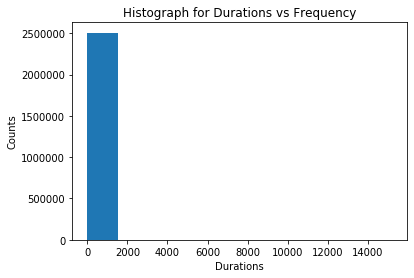

In [15]:
df2["duration_min"].plot.hist();
plt.title("Histograph for Durations vs Frequency");
plt.xlabel("Durations");
plt.ylabel("Counts");

### it seems that there is outliers 
### so i will detect outliers

In [16]:
# exploring outliers 

Q1 = df2["duration_min"].quantile(0.25)
Q3 = df2["duration_min"].quantile(0.75)
IQR = Q3 - Q1
print("no of outleirs is ",((df2["duration_min"] < (Q1 - 1.5 * IQR)) | (df2["duration_min"] > (Q3 + 1.5 * IQR))).sum())
print("outleirs edges is between ",Q1 - 1.5 * IQR ," and ",Q3 + 1.5 * IQR)


no of outleirs is  134858
outleirs edges is between  -7.5  and  28.5


### ploting durations without outliers

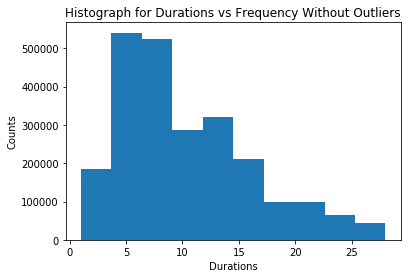

In [17]:

df2_no_outleirs=df2[df2["duration_min"] > (Q1 - 1.5 * IQR)]
df2_no_outleirs=df2_no_outleirs[df2_no_outleirs["duration_min"] <  (Q3 + 1.5 * IQR)]
df2_no_outleirs["duration_min"].plot.hist();
plt.title("Histograph for Durations vs Frequency Without Outliers");
plt.xlabel("Durations");
plt.ylabel("Counts");

### Changing binsize  

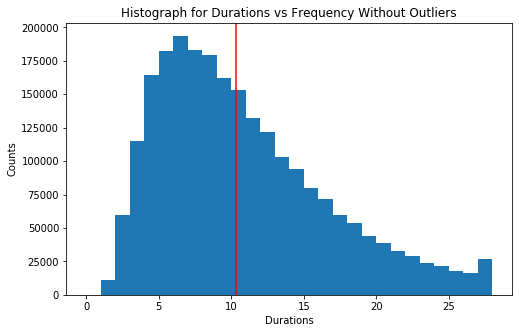

In [18]:
binsize = 1
bins = np.arange(0, df2_no_outleirs["duration_min"].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2_no_outleirs, x = 'duration_min', bins = bins)
plt.xlabel('duration (minute)')
plt.axvline(df2_no_outleirs["duration_min"].mean(), color='r')
plt.title("Histograph for Durations vs Frequency Without Outliers");
plt.xlabel("Durations");
plt.ylabel("Counts");
plt.show();


# work with time columns

In [19]:
df2.head()

,duration_min,start_time,end_time,user_type,bike_share_for_all_trip,rental_access_method
0,1347.0,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,Subscriber,No,NaN
1,1098.0,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,Subscriber,No,NaN
2,1044.0,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,Customer,No,NaN
3,745.0,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,Customer,No,NaN
4,1012.0,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,Customer,No,NaN


# converting start_time column to datetime datatype

In [20]:
df2.start_time=pd.to_datetime(df2.start_time, errors='coerce')

In [21]:
# adding seperate columns to hours , month 

df2['month'] = df2.start_time.dt.strftime("%b")
df2['hour'] = df2.start_time.dt.hour


In [22]:
# maping weekdays from numbers to names

dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df2['week_day'] = df2['start_time'].dt.dayofweek.map(dayOfWeek)

df2.drop(columns="start_time", inplace=True)

In [23]:
# making sure that all values in weekdays are days names 

df2['week_day'].unique()

array(['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday',
       'Friday'], dtype=object)

In [24]:
df2.week_day.value_counts()

Tuesday      427640
Thursday     424474
Wednesday    414448
Friday       397284
Monday       396463
Saturday     234370
Sunday       212304
Name: week_day, dtype: int64

### ploting weekdays vs count to know the crowdest day 

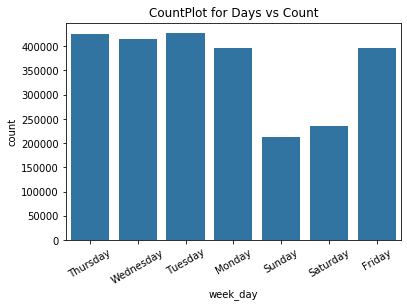

<Figure size 576x360 with 0 Axes>

In [25]:
base_color = sb.color_palette()[0]
sb.countplot(x ='week_day', data = df2 , color = base_color).set_title('CountPlot for Days vs Count'); 
plt.xticks(rotation=30)
plt.figure(figsize=[8, 5])

plt.show() 

**Here, we can clearly see that people have mostly rented bikes on Tuesday and least rented on Sundays. It may be due to the fact that working class people are more busy on weekdays and are more likely to take rest on weekends**

### ploting hours vs count to know the crowdest hours 

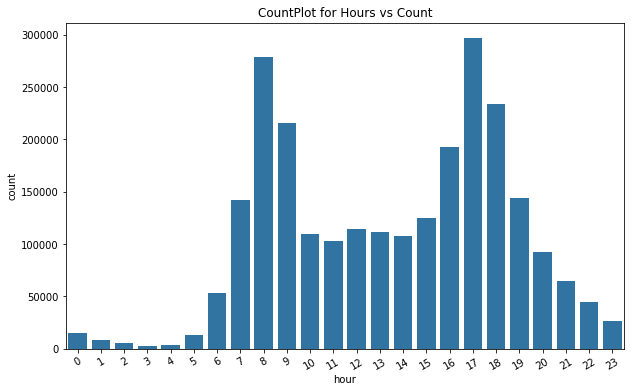

In [26]:
plt.figure(figsize=[10, 6])
sb.countplot(x ='hour', data = df2,color = base_color)
plt.xticks(rotation=30)
plt.title("CountPlot for Hours vs Count");
plt.show() 

**Here, we can clearly see that people have mostly rented bikes on 8 AM and 5 PM. It may be due to that this hours is the beginning and ending of the work and school hours and very low rented bikes in the night  **

### ploting months vs count to know the crowdest months 

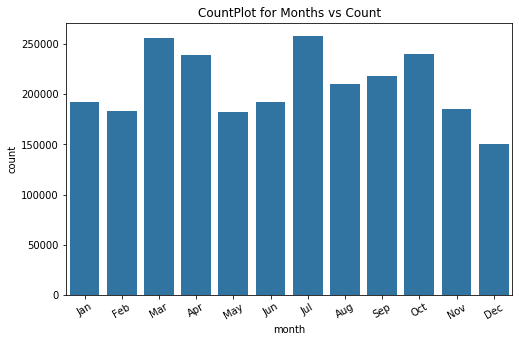

In [27]:
plt.figure(figsize=[8, 5])

sb.countplot(x ='month', data = df2,color = base_color) 
plt.xticks(rotation=30)
plt.title("CountPlot for Months vs Count");
plt.show() 

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 8 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_min             float64
 1   end_time                 object 
 2   user_type                object 
 3   bike_share_for_all_trip  object 
 4   rental_access_method     object 
 5   month                    object 
 6   hour                     int64  
 7   week_day                 object 
dtypes: float64(1), int64(1), object(6)
memory usage: 153.0+ MB


**I will now move on to exploring individual distributions for other categorical variables left. Let's plot them all at once**

### Createing a subplot to plot the distributions of user_type , bike_share_for_all_trip and rental_access_method altogether

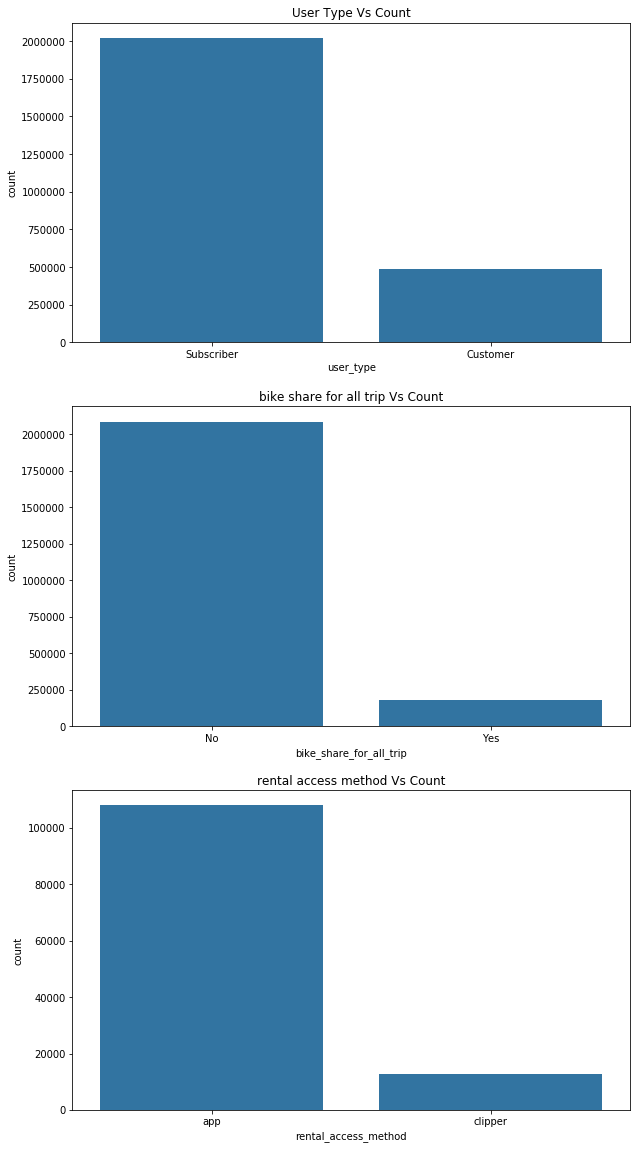

In [29]:
base_color = sb.color_palette()[0]


fig, axis = plt.subplots(nrows = 3, figsize = [10,20])
sb.countplot(data = df2, x = 'user_type', color = base_color, ax = axis[0]).set_title('User Type Vs Count');
sb.countplot(data = df2, x = 'bike_share_for_all_trip', color = base_color, ax = axis[1]).set_title('bike share for all trip Vs Count');
sb.countplot(data = df2, x = 'rental_access_method', color = base_color, ax = axis[2]).set_title('rental access method Vs Count');


**We can clearly see here the vast differences in counts of divisions under each categorical variable.  there are much more subscribers than customers may be due to having additional benefits of being a subscriber.also , in the bike share for all trip many riders prefere not to share bikes . In the end graph, there are very less people who use clipper as a rental access method than people with app method.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> When I explored duration_sec, it was distributed over a wide range with extreme outliers. Even after setting the axis limits, I saw that this was a highly right skewed positive graph. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> in the duration column i changed it from seconds to minutes th make the data more readable 
i also changed start and end date to pandas datetype and added new columns for month , day and hour 
to explore the distributions of each column alone 

## Bivariate Exploration




***So, let's start exploring duration_min with time variables. So, first we will explore relationship between duration and week days through violinplot and pointpot***

***Because of the outliers, it is necessary to set the duration limits between 0 and maximum. Therefore, limits for the duration_min variable is calculated below:***


In [30]:
Q1 = df2["duration_min"].quantile(0.25)
Q3 = df2["duration_min"].quantile(0.75)
IQR = Q3 - Q1
print("no of outleirs is ",((df2["duration_min"] < (Q1 - 1.5 * IQR)) | (df2["duration_min"] > (Q3 + 1.5 * IQR))).sum())
print("outleirs edges is between ",Q1 - 1.5 * IQR ," and ",Q3 + 1.5 * IQR)

no of outleirs is  134858
outleirs edges is between  -7.5  and  28.5


In [31]:
# Create a subset with necessary variables and duration limits

time_data = df2.query('duration_min >= 0 & duration_min <= 28.5 ')

### first i will explore relationship between duration and week days through violinplot and pointpot

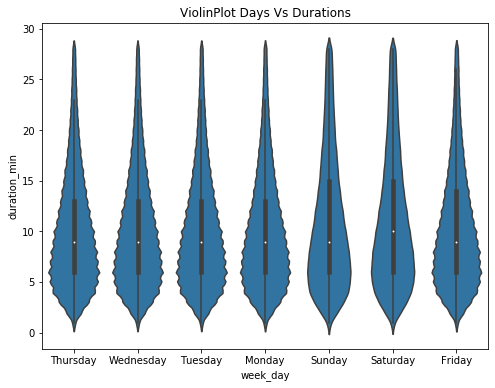

In [32]:
plt.figure(figsize = (8,6))
base_color = sb.color_palette()[0]

# Plot the violinplot for duration_min vs week_day
sb.violinplot(data = time_data, x = 'week_day', y = 'duration_min', color = base_color).set_title('ViolinPlot Days Vs Durations');

***

So, here, high variance is observed on all weekdays with right skewed distribution of duration. As we see more closer, we find that density is thick on weekdays than weekends but at almost same duration level on all weekdays which suggests high number of bikes being rented for that duration.
***

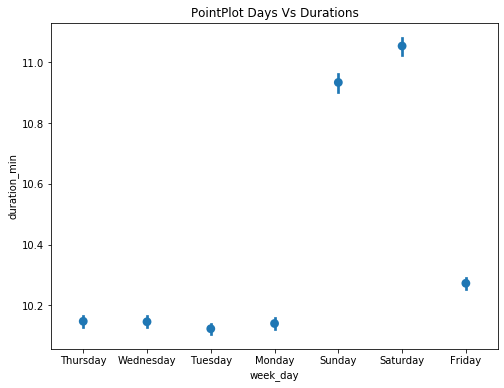

In [33]:
plt.figure(figsize = (8,6))
base_color = sb.color_palette()[0]

sb.pointplot(data = time_data, x = 'week_day', y = 'duration_min', color = base_color, linestyles = '').set_title('PointPlot Days Vs Durations');

***
This shows an interesting observation in addition to the above plot. Although most bikes may have been rented on weekdays for same duration but people have liked to rent bikes on weekends for a longer duration
***

#### Next, we will explore relationship between duration and months through violinplot and pointplot

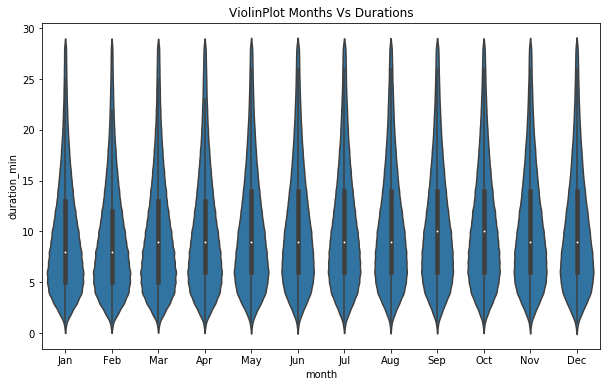

In [34]:
plt.figure(figsize = (10,6))
base_color = sb.color_palette()[0]
sb.violinplot(data = time_data, x = 'month', y = 'duration_min', color = base_color, aspect = 1.5).set_title('ViolinPlot Months Vs Durations');


***The right skewed distributions, as we can see here, is almost the same every month. Even the medians are at the same level of duration, a little below 10 minute. This suggests most bikes are rented for almost same duration level in all the months***

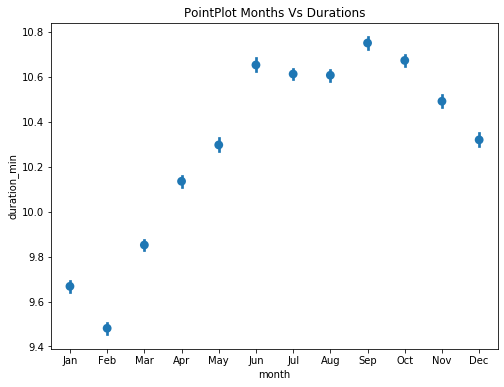

In [35]:
plt.figure(figsize = (8,6))
base_color = sb.color_palette()[0]
sb.pointplot(data = time_data, x = 'month', y = 'duration_min', color = base_color, linestyles = '').set_title('PointPlot Months Vs Durations');

***Now, this is interesting. As shown here, average duration from june  to october is the highest and january and febreury is the lowest. This suggests, people have liked to go out on bikes for longer duration in summers than months of winter as we can see ***

#### Now, finally explore relationship between duration and hours through violinplot

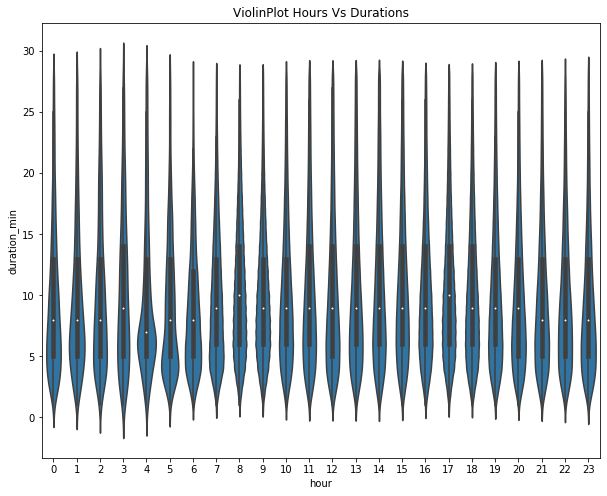

In [36]:
plt.figure(figsize = (10, 8))
base_color = sb.color_palette()[0]
sb.violinplot(data = time_data, x = 'hour', y = 'duration_min', color = base_color).set_title('ViolinPlot Hours Vs Durations');

***There is an interesting pattern to note here. Firstly, all hours are positively skewed. Secondly, according to the peak densities, less number of bikes have been rented during 1-3 a.m. and 11a.m. - 3p.m.during the day with most number of bikes being rented at 5 a.m. Most number of bikes around 4 a.m. were rented for low duration of around 6 minutes while most number of bikes around 2 p.m. were rented for high duration of around 9 minutes.***

#### Now, let's explore the relation of duration with variables that define user's personal information. 
 

In [37]:
def myhist(x, **kwargs):
    bins = np.arange(0, df2_no_outleirs["duration_min"].max()+binsize, binsize)
    plt.hist(x,  bins = bins)
    plt.title("Durations Vs Count for each User Type")
    plt.xlabel("Counts")


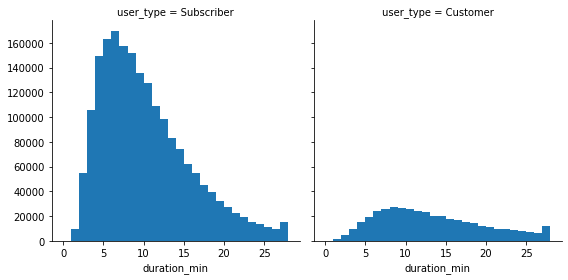

In [38]:
g = sb.FacetGrid(data = df2, col = 'user_type', height = 4)
g = g.map(myhist, 'duration_min')



***It is clearly shown that Subscribers have rented a lot more bikes than Customers. Peak for the number of times for bike rentals is above 160,000 for subscribers with duration below 10  minutes while it is under 40,000 for Customers with duration above 10 minutes***

#### Similarly, let's explore the relationship between duration and rental_access_method
 

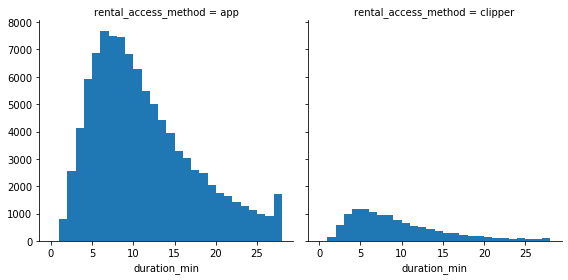

In [39]:
g = sb.FacetGrid(data = df2, col = 'rental_access_method', height = 4)
g = g.map(myhist, 'duration_min')

***It is clearly shown that rentals using application have rented a lot more bikes than rentals using clipper. Peak for the number of times for bike rentals is arround 8,000 for application with duration below 10  minutes while it is arround 2,000 for Customers with duration above 5 minutes***

### i will explore relationship between user type and week days through countplot

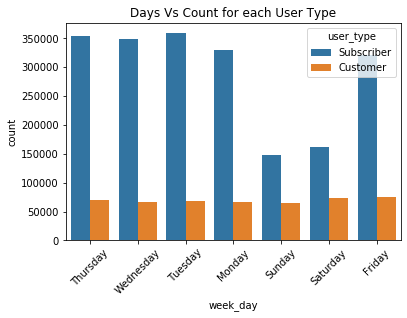

In [40]:
sb.countplot(data = df2, x = 'week_day', hue = 'user_type').set_title('Days Vs Count for each User Type')
plt.xticks(rotation = 45);


#### there is an interesting observation that customer user type are regular with renting with the same number all week                     on the other side subscriber user type decrease over weekends  

### i will explore relationship between rental access method and week days through countplot

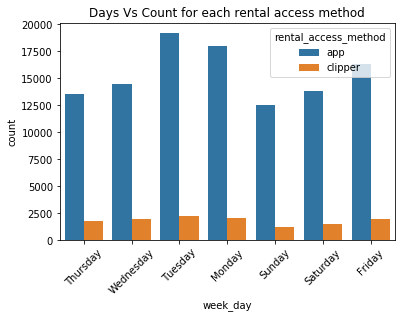

In [41]:
sb.countplot(data = df2, x = 'week_day', hue = 'rental_access_method').set_title('Days Vs Count for each rental access method')
plt.xticks(rotation = 45);


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> When we related duration with weekdays, we saw that people are likely to go for long rides on weekends although most bikes get rented on weekdays.
    
>    When we related duration with months, we saw that people have liked to go out on long rides and enjoy in summers in june than in winter.
    
>    When we related duration with hours, we saw that there was an interesting pattern. During the early morning hours form 1a.m. to 4 a.m., people have less liked to rent bikes and also the ones who rented were also for short duration. While most number of bikes around 2 p.m. were rented for high duration of around 10 minutes.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> So, when we were exploring user information variables with other variables, we saw they relate to one another in an interesting way.
     
> there is an interesting observation that customer user type are regular with renting with the same number all week on the other side subscriber user type decrease over weekends

## Multivariate Exploration

> So, in the previous section, in the beginning, we found some interesting relationships in duration vs weekdays pointplots and duration vs month pointplots. So, lets explore these point plots further with variables that identify user information, user type and rental access method specifically, as both these variables had shown similar trends when we related them with duration and other time variables hour, weekday and month. So let's start with week_day vs duration_min pointplot from the previous section and explore it further with user type and rental access method groups.


### i will explore relationship between user type , week days and durations through countplot

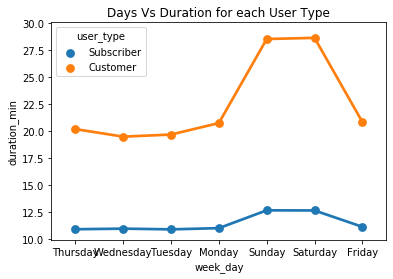

In [42]:
sb.pointplot(data = df2, x = 'week_day', y = 'duration_min', hue = 'user_type', linestyles = '-', errwidth = 0).set_title('Days Vs Duration for each User Type');

# observation
it seems that subscribers use the bikes neerly for the same time all days

on the other way customers tend to use the bikes for longer time on weekends 

and that customers uses the bikes on average for longer times than subscribers all days

### i will explore relationship between rental access method , week days and durations through countplot

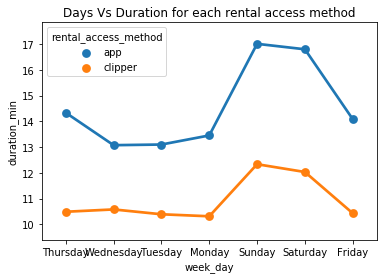

In [43]:
sb.pointplot(data = df2, x = 'week_day', y = 'duration_min', hue = 'rental_access_method', linestyles = '-', errwidth = 0).set_title('Days Vs Duration for each rental access method');

# observation
Almost all the two rental access method groups show similar trend in terms of for what average duration they rented the bikes on each weekday

and that app users uses the bikes for longer times than clipper users all days

### i will explore relationship between user type , months and durations through countplot 

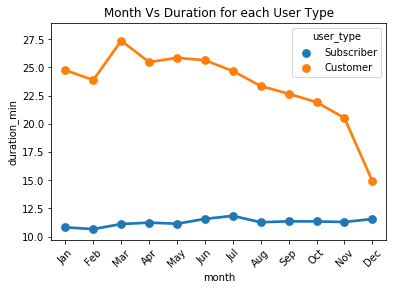

In [44]:
sb.pointplot(data = df2, x = 'month', y = 'duration_min', hue = 'user_type', linestyles = '-', errwidth = 0).set_title('Month Vs Duration for each User Type');
plt.xticks(rotation = 45);

# observation
it seems that subscribers use the bikes neerly for the same time all months

on the other way customers tend to use the bikes for longer time in the first half of the year 

and that customers uses the bikes on average for longer times than subscribers all months

### i will explore relationship between rental access method , months and durations through countplot 

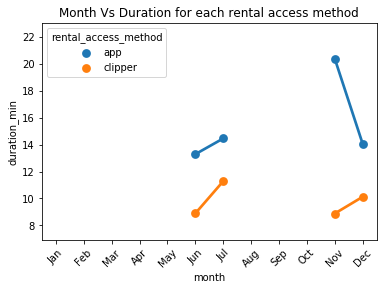

In [45]:
sb.pointplot(data = df2, x = 'month', y = 'duration_min', hue = 'rental_access_method', linestyles = '-', errwidth = 0).set_title('Month Vs Duration for each rental access method');
plt.xticks(rotation = 45);

# observation
Almost all the two rental access method groups show similar trend in terms of for what average duration they rented the bikes on June and July
but they show the opposite trend in the months November and December
where we can see that app users renting time decrease while clipper users time increase

and in general app users uses the bikes for longer times than clipper users all months

# Key Insights

    People are likely to use bikes for in the beggining and ending of the wroking hours.
    The bike usage shows an overall increase in 2019. People use bike more in weekdays than weekends but for   longer times in weekends than weekdays.
    app users are likely to use the bike for a relatively long duration than clippers.
    Compared to the subscriber, the customer has a higher duration .
    the app users are much more than clipper users.
    subscribers are much more than customers.
    people tend not to share bikes for all trips.
    


In [ ]:
!jupyter nbconvert presentation.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook presentation.ipynb to slides
[NbConvertApp] Writing 761244 bytes to presentation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/presentation.slides.html
Use Control-C to stop this server
